# Machine Learning topological phases in real space: Nearest and second nearest-neighbours SSH model.

In [1]:
#%load_ext autoreload
#%autoreload 

In [2]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Running models with SSH data

In [3]:
%load_ext autoreload
%autoreload 2
from simulation import *

In [5]:
### YOU MAY NEED TO CHANGE THE CSV FILENAME!!!
csv_path = "/home/rio/data/phase_transitions/csv/second_neighbours_periodic_6561_50.csv"     
model = RandomForestClassifier(n_estimators=50,criterion="entropy",n_jobs=-1)
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!!!
allowed_windings = [-1,0,1,2]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_periodic_6561_50"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!!!
val_split = 0.5  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!!!!!
random_state = 123                    

dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings, \
             "simulation_dir": simulation_dir, "val_split": val_split, \
             "features_to_use": features_to_use, "shuffle_features": shuffle_features, 
             "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656100 entries, 0 to 656099
Columns: 108 entries, id to feat100
dtypes: float64(103), int32(3), object(2)
memory usage: 538.1+ MB


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.130965,0.301130,...,-0.080279,-0.115687,-0.174988,0.245064,0.319763,-0.059082,-0.000556,-0.245133,-0.301130,0.130965
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.130965,-0.301130,...,-0.080279,0.115687,-0.174988,-0.245064,0.319763,0.059082,-0.000556,0.245133,-0.301130,-0.130965
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.148414,-0.042467,...,0.185442,-0.080620,-0.066211,-0.121339,-0.151700,0.192513,0.191642,-0.050956,-0.042467,-0.148414
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,-0.069630,-0.026147,...,0.102009,-0.100671,-0.081002,-0.020715,-0.058717,0.115834,0.118274,-0.054666,-0.026147,-0.069630
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,666,test,0.010206,-0.014625,...,0.047555,-0.041368,-0.018852,-0.017673,-0.023377,0.031447,0.010280,0.000925,0.014625,-0.010206


#### Unque winding values

In [6]:
np.unique(simulation.dataframe.phase.values)

array([ -1,   0,   1,   2, 999], dtype=int32)

#### Checking initialization

In [7]:
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  100
n_hamiltonians:  6561
n_ts:  2


In [8]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8414875781130925
% val:  0.0
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  5521
number of val hamiltonians:  0
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 

## Running a simulation

In [9]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [2:18:26<00:00, 85.73s/it] 


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.130965,0.301130,...,-0.080279,-0.115687,-0.174988,0.245064,0.319763,-0.059082,-0.000556,-0.245133,-0.301130,0.130965
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,-0.130965,-0.301130,...,-0.080279,0.115687,-0.174988,-0.245064,0.319763,0.059082,-0.000556,0.245133,-0.301130,-0.130965
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.148414,-0.042467,...,0.185442,-0.080620,-0.066211,-0.121339,-0.151700,0.192513,0.191642,-0.050956,-0.042467,-0.148414
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,-0.069630,-0.026147,...,0.102009,-0.100671,-0.081002,-0.020715,-0.058717,0.115834,0.118274,-0.054666,-0.026147,-0.069630
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.010206,-0.014625,...,0.047555,-0.041368,-0.018852,-0.017673,-0.023377,0.031447,0.010280,0.000925,0.014625,-0.010206
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.116962,0.021475,...,-0.086901,-0.045676,-0.028034,0.129266,0.130083,-0.098190,-0.104188,-0.007911,0.021475,0.116962
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,-1,test,0.037175,-0.095882,...,-0.027490,0.046168,0.063419,-0.041630,-0.085769,-0.010604,-0.009822,0.084024,0.095882,-0.037175
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,0,test,0.027709,-0.038180,...,0.123344,-0.114320,-0.057118,-0.040291,-0.061263,0.087153,0.029599,-0.001276,0.038180,-0.027709
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.059795,0.030272,...,-0.082347,0.140996,0.128386,-0.036608,0.029628,-0.124877,-0.140478,0.088573,0.030272,0.059795
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,999,1,test,0.141605,0.013497,...,-0.035718,-0.110014,-0.082452,0.146084,0.152588,-0.067575,-0.087187,-0.043484,0.013497,0.141605


#### Viewing a random sample

In [10]:
simulation.dataframe.sample(frac=0.1, replace=False)

,id,path,t1,t2,winding,phase,pred_phase,type_of,feat1,feat2,...,feat91,feat92,feat93,feat94,feat95,feat96,feat97,feat98,feat99,feat100
528075,5280,H_1.25_-1.25_1.00098.dat,1.25,-1.25,1.000976,1,1,train,0.100504,0.010608,...,0.072783,0.086207,0.184383,0.101690,-0.068443,0.006373,-0.009185,-0.139380,0.010608,0.100504
326108,3261,H_0_-0.95_1.00331.dat,0.00,-0.95,1.003311,1,1,train,0.011895,-0.011530,...,-0.035305,0.007975,-0.052153,0.077763,-0.001759,0.009359,0.012691,-0.027785,0.011530,-0.011895
237070,2370,H_-0.55_-0.95_1.00936.dat,-0.55,-0.95,1.009356,1,0,val,-0.125363,0.065233,...,-0.123060,-0.005914,-0.090788,0.196133,-0.069991,-0.004707,-0.087495,0.118646,0.065233,-0.125363
477484,4774,H_0.9_1.8_2.00422.dat,0.90,1.80,2.004218,2,2,train,-0.023596,-0.102979,...,-0.090371,-0.026478,-0.057663,-0.140325,0.113861,0.097864,-0.045245,0.085010,-0.102979,-0.023596
281738,2817,H_-0.3_1.15_0.000747996.dat,-0.30,1.15,0.000748,0,0,val,0.136002,-0.016570,...,0.136213,0.022500,0.044891,0.147927,-0.137205,0.045893,-0.077741,-0.088113,0.016570,-0.136002
497438,4974,H_1.05_-0.35_1.0005.dat,1.05,-0.35,1.000504,1,1,val,0.082230,-0.073385,...,0.127111,-0.123765,-0.010141,0.038369,-0.149161,0.133027,-0.052127,0.062100,0.073385,-0.082230
569996,5699,H_1.5_-0.55_1.00037.dat,1.50,-0.55,1.000372,1,1,val,-0.002245,0.000680,...,-0.095366,0.071778,-0.047473,0.028331,-0.013491,0.001898,0.001923,-0.005248,0.000680,-0.002245
387326,3873,H_0.35_1.3_2.00223.dat,0.35,1.30,2.002226,2,2,train,-0.092053,-0.017006,...,-0.032177,0.125069,0.084493,0.025316,0.151994,-0.092113,0.070992,-0.137170,-0.017006,-0.092053
647740,6477,H_1.95_1.9_-1.10945.dat,1.95,1.90,-1.109448,-1,2,test,0.018695,0.088677,...,0.062289,-0.053314,0.062947,0.117730,-0.110205,-0.047052,0.031560,-0.075872,0.088677,0.018695
189047,1890,H_-0.85_-0.65_-0.0170913.dat,-0.85,-0.65,-0.017091,0,0,test,0.058826,0.011558,...,0.103115,0.144515,-0.031803,0.056001,-0.133931,-0.074741,-0.125039,-0.135017,-0.011558,-0.058826


#### Checking train/val/test splits again

In [11]:
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


train ids:  [2874, 1736, 3046, 4828, 3679, 1111, 3602, 1440, 2489, 6081, 1628, 4303, 2122, 556, 4815, 2632, 2307, 1600, 618, 4307, 4663, 1934, 790, 5423, 117, 2037, 3767, 5976, 4305, 4277, 5670, 5953, 3233, 2501, 2446, 4764, 4962, 3434, 373, 4308, 6448, 4909, 6242, 2962, 3201, 5637, 1110, 2305, 6366, 4480, 6427, 5194, 3585, 927, 261, 1873, 2921, 3467, 5156, 317, 3385, 359, 6324, 4555, 3689, 711, 2302, 2342, 4697, 4478, 4546, 5008, 6333, 802, 4967, 6124, 3561, 201, 5547, 4624, 5242, 5325, 1823, 3694, 4649, 1377, 1948, 3774, 4681, 431, 3372, 1528, 6424, 2879, 3719, 667, 108, 2641, 868, 4401, 4200, 225, 4160, 3675, 3402, 794, 5073, 2262, 2477, 2939, 671, 1941, 106, 3674, 5962, 2222, 4822, 1985, 3388, 5041, 5530, 4557, 5877, 352, 6290, 

#### Checking summaries

In [12]:
ham_summary = simulation.hamiltonian_summary
ham_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.19,0.45,0.32,0.04,999,0
1,-2.0,-1.95,test,0.21,0.45,0.28,0.06,-1,0
2,-2.0,-1.90,test,0.22,0.46,0.29,0.03,-1,0
3,-2.0,-1.85,test,0.28,0.38,0.29,0.05,-1,0
4,-2.0,-1.80,test,0.24,0.38,0.37,0.01,-1,0
5,-2.0,-1.75,test,0.23,0.46,0.30,0.01,-1,0
6,-2.0,-1.70,test,0.21,0.51,0.26,0.02,-1,0
7,-2.0,-1.65,test,0.29,0.38,0.31,0.02,-1,0
8,-2.0,-1.60,test,0.31,0.39,0.28,0.02,-1,0


In [13]:
len(ham_summary)

6561

In [14]:
eigen_summary = simulation.eigenvector_summary
eigen_summary

,id,phase,pred_phase,type_of
0,0,999,-1,test
1,0,999,-1,test
2,0,999,1,test
3,0,999,1,test
4,0,999,-1,test
5,0,999,1,test
6,0,999,-1,test
7,0,999,0,test
8,0,999,1,test
9,0,999,1,test


In [15]:
len(eigen_summary)

656100

In [16]:
simulation.accuracy

{'eigenvector_train': 0.9997645780514306,
 'eigenvector_val': 0.9750905797101449,
 'eigenvector_test': 0.6680558789289872,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9989130434782608,
 'hamiltonian_test': 0.8649592549476135}

In [17]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [18]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [19]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

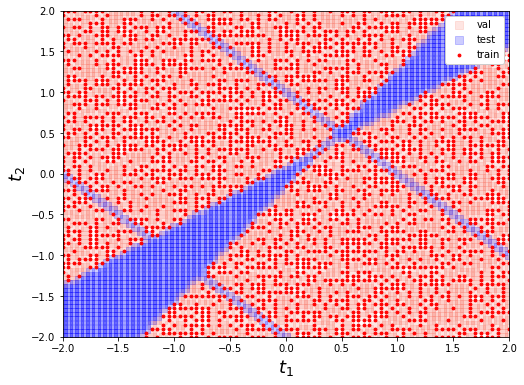

In [21]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [29]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing Experiment class

In [30]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_periodic_6561_50"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [31]:
experiment.print_train_val_test()

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


#### Viewing dataset summary

In [32]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
 0    0.325122
 1    0.322586
-1    0.178953
 2    0.173338
Name: phase, dtype: float64


total train/val phases: 
 0    1795
 1    1781
-1     988
 2     957
Name: phase, dtype: int64


Summary of test data

% test phases: 
 2    0.399302
-1    0.363213
 1    0.126892
 0    0.110594
Name: phase, dtype: float64


total test phases: 
 2    343
-1    312
 1    109
 0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
 1    0.296238
 0    0.296238
-1    0.203762
 2    0.203762
Name: phase, dtype: float64


total phases: 
 1    1890
 0    1890
-1    1300
 2    1300
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [33]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,999,-1,test
1,0,999,-1,test
2,0,999,1,test
3,0,999,-1,test
4,0,999,-1,test


#### Viewing Hamiltonian summary

In [34]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.17,0.47,0.33,0.03,999,0
1,-2.0,-1.95,test,0.20,0.49,0.27,0.04,-1,0
2,-2.0,-1.90,test,0.16,0.48,0.35,0.01,-1,0
3,-2.0,-1.85,test,0.23,0.38,0.39,0.00,-1,1
4,-2.0,-1.80,test,0.22,0.37,0.39,0.02,-1,1


#### Viewing accuracy

In [35]:
experiment.accuracy

{'eigenvector_train': 0.9997030061571894,
 'eigenvector_val': 0.9726485507246376,
 'eigenvector_test': 0.6553084982537835,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9974637681159421,
 'hamiltonian_test': 0.860302677532014}

#### Visualizing train/val/test splits with scatter plot

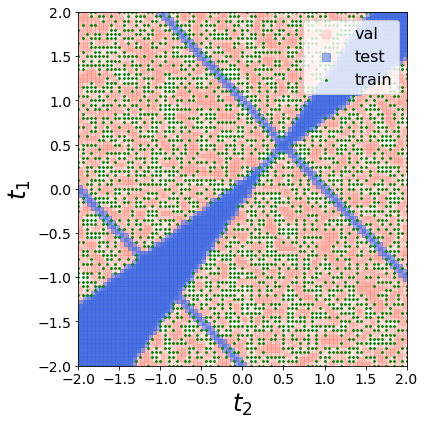

In [36]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

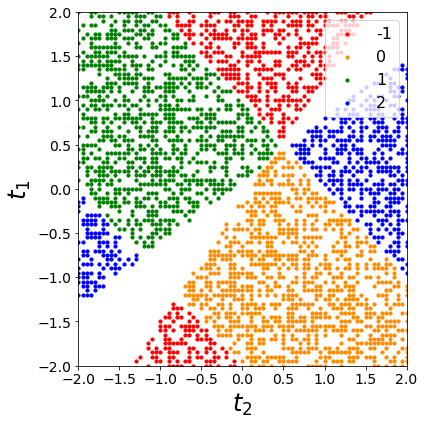

In [37]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

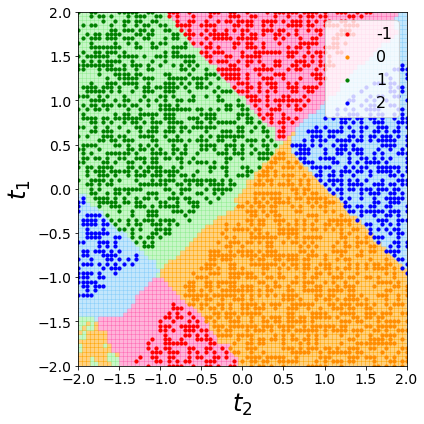

In [38]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, -1: {"marker": "o", "s": 10, "color": "red", "label": -1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}}
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)




#### Plotting Winding Heatmaps (winding -1 = red)

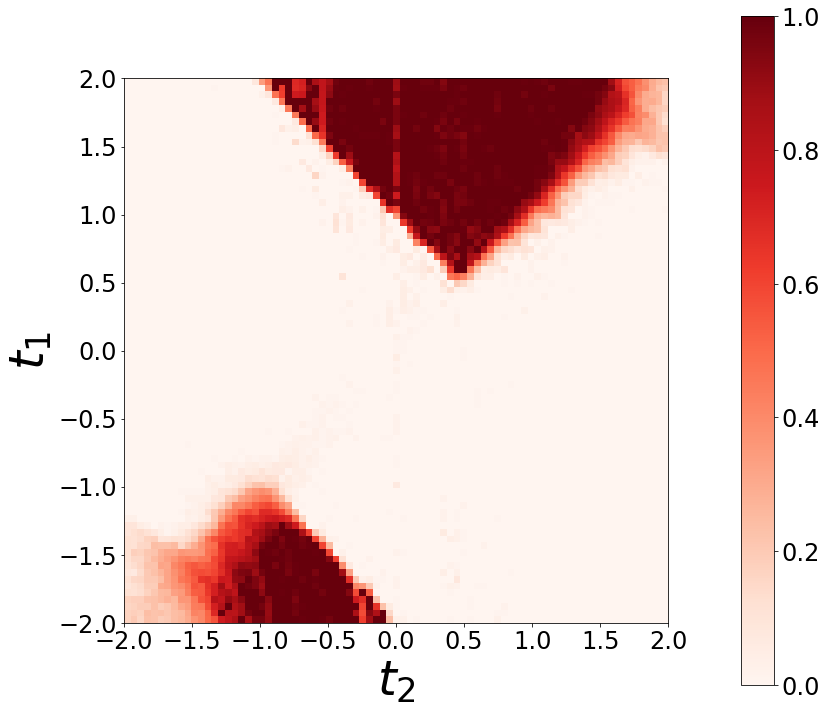

In [39]:
winding = -1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 0 = orange)

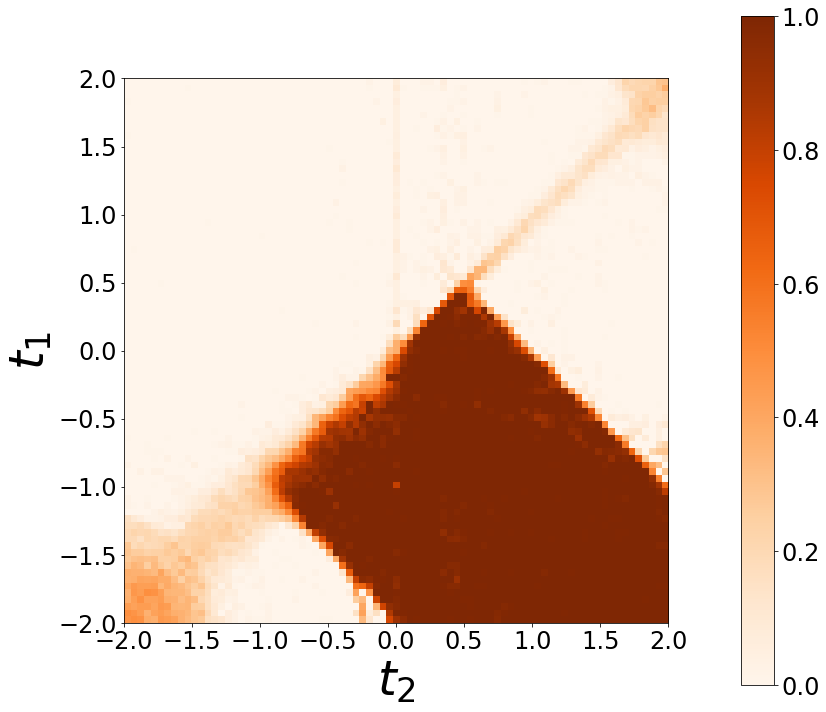

In [40]:
winding = 0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Winding Heatmaps (winding 1 = green)

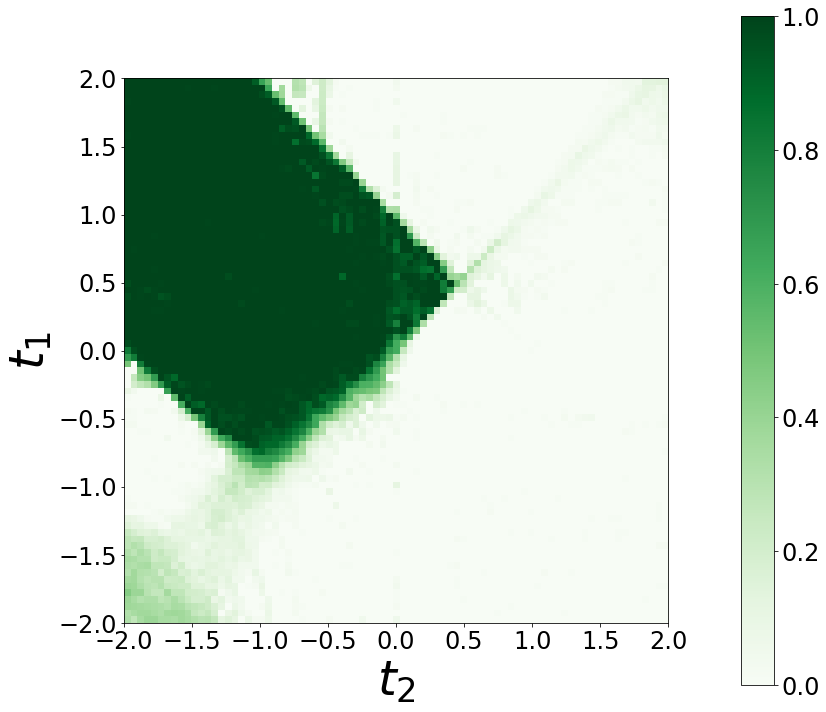

In [41]:
winding = 1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting Winding Heatmaps (winding 2 = blue)

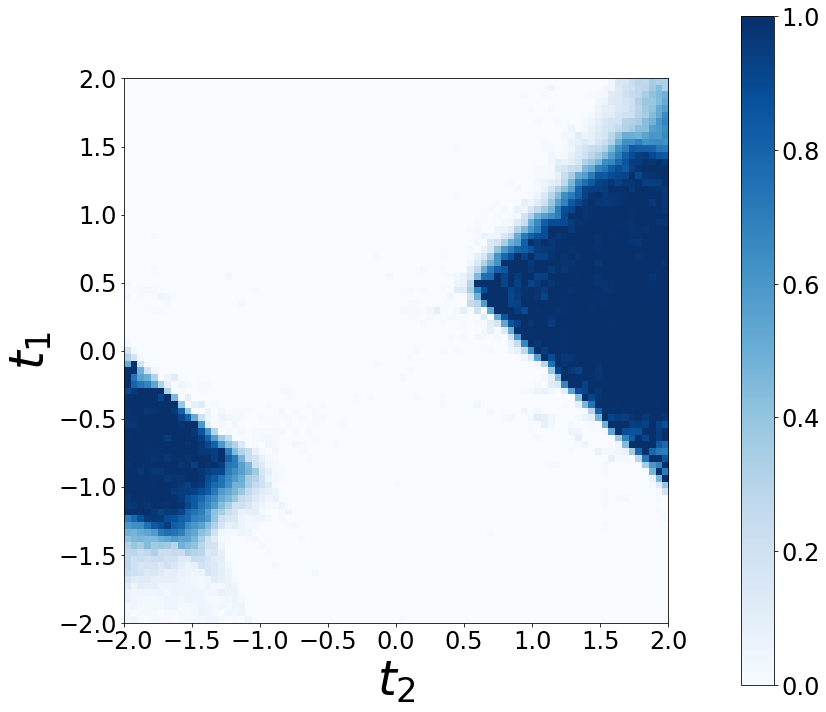

In [42]:
winding = 2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

#### Plotting merged heatmaps

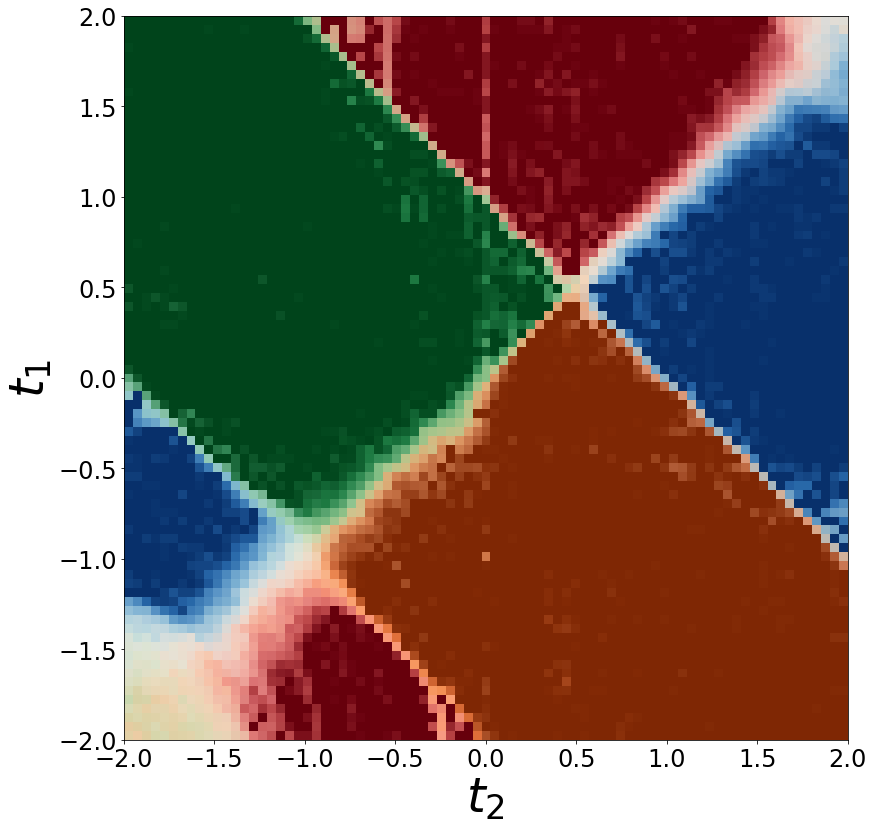

In [43]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
colorbar_params={}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
#path_to_save = "/home/linneu/Dropbox/Machine/paper_linneu/fig1b-6561-100-merged_winding_grid_0.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [44]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/second_neighbours_periodic_6561_50"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [46]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 154166.24it/s]


In [47]:
simulation.hamiltonian_summary

,t1,t2,type_of,-1,0,1,2,phase,pred_phase
id,,,,,,,,,
0,-2.0,-2.00,test,0.2055,0.4821,0.2739,0.0385,999,0
1,-2.0,-1.95,test,0.2144,0.4931,0.2608,0.0317,-1,0
2,-2.0,-1.90,test,0.2153,0.4689,0.2856,0.0302,-1,0
3,-2.0,-1.85,test,0.2425,0.4087,0.3167,0.0321,-1,0
4,-2.0,-1.80,test,0.2424,0.4127,0.3216,0.0233,-1,0
5,-2.0,-1.75,test,0.2520,0.4262,0.3035,0.0183,-1,0
6,-2.0,-1.70,test,0.2681,0.4248,0.2849,0.0222,-1,0
7,-2.0,-1.65,test,0.2976,0.3873,0.2947,0.0204,-1,0
8,-2.0,-1.60,test,0.3350,0.3567,0.2816,0.0267,-1,0


#### Plotting Simulation Winding Heatmaps (winding -1 = red)

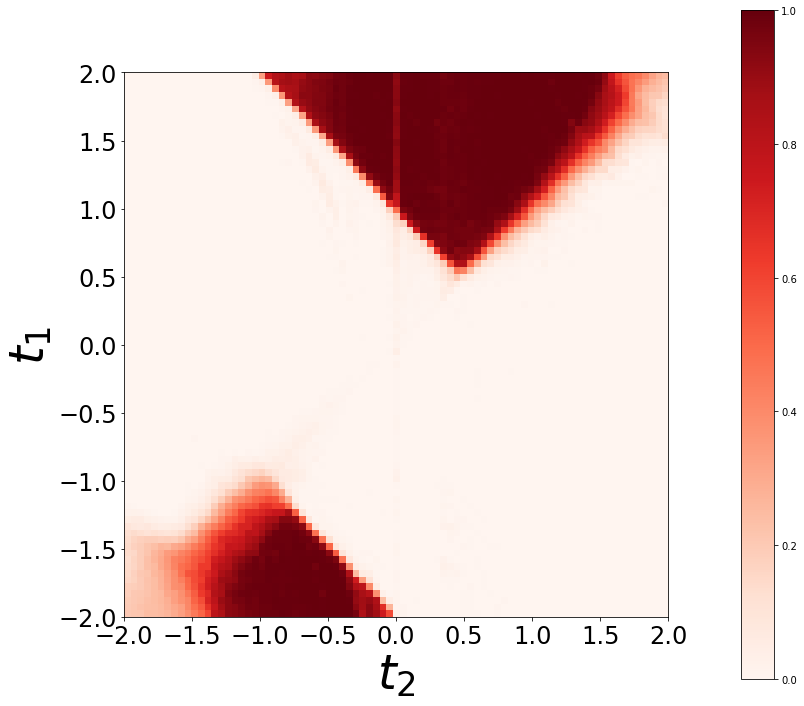

In [48]:
winding =-1
imshow_params = {"cmap": "Reds", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_simulation_winding_-1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 0 = orange)

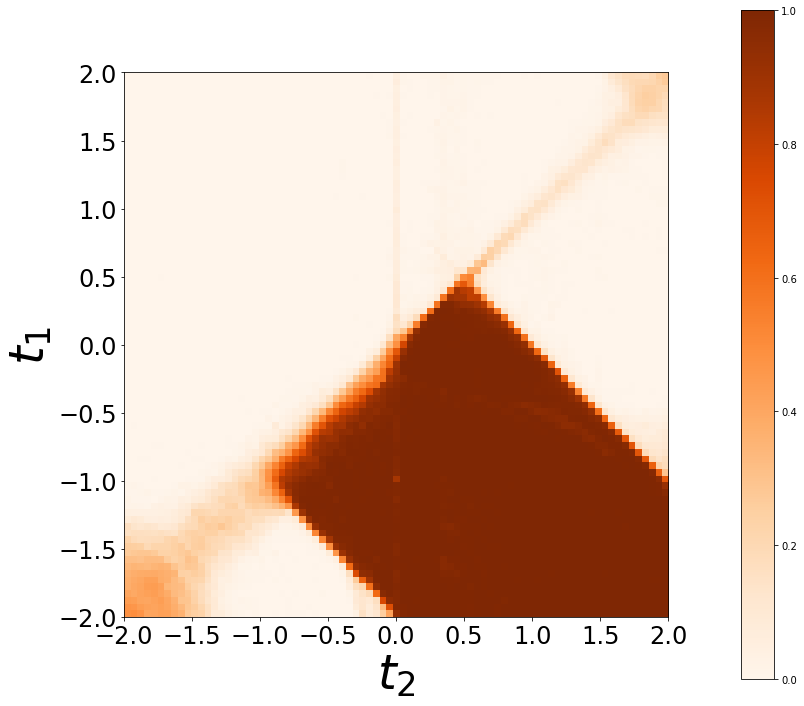

In [49]:
winding =0
imshow_params = {"cmap": "Oranges", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_simulation_winding_0_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 1 = green)

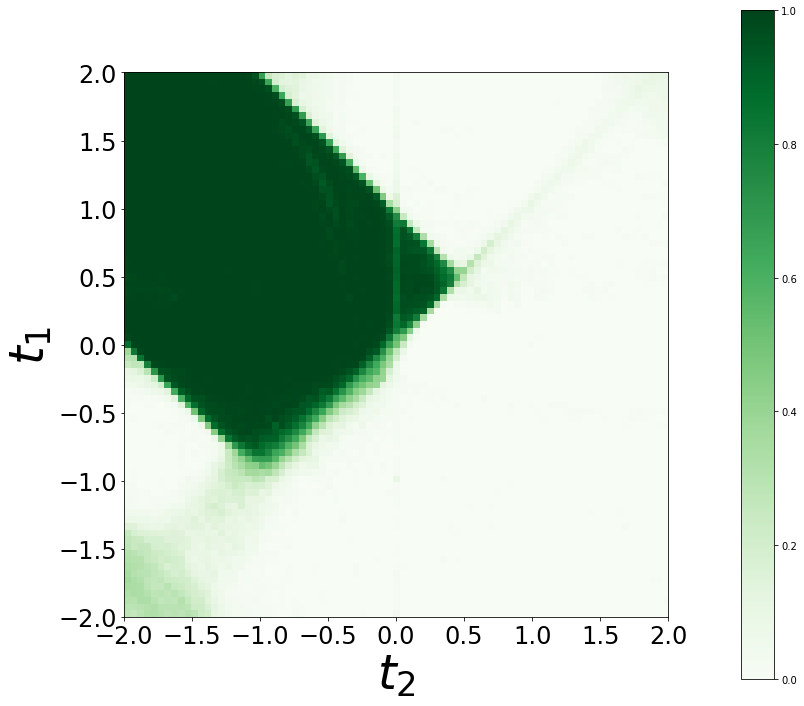

In [50]:
winding =1
imshow_params = {"cmap": "Greens", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_simulation_winding_1_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Simulation Winding Heatmaps (winding 2 = blue)

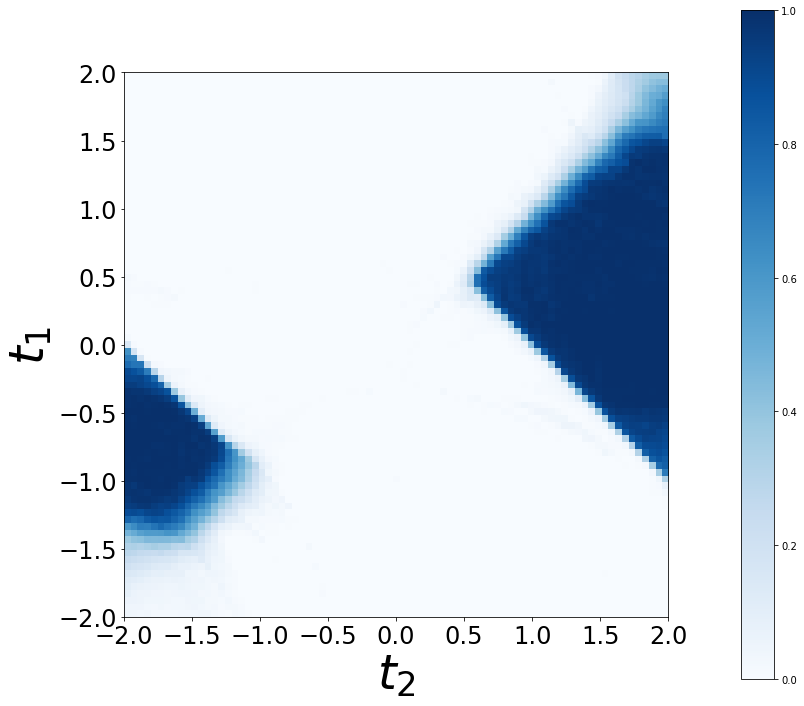

In [51]:
winding =2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_simulation_winding_2_grid.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
simulation.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)


#### Plotting Merged Simulation Winding Heatmaps

Plotting winding -1
Plotting winding 0
Plotting winding 1
Plotting winding 2


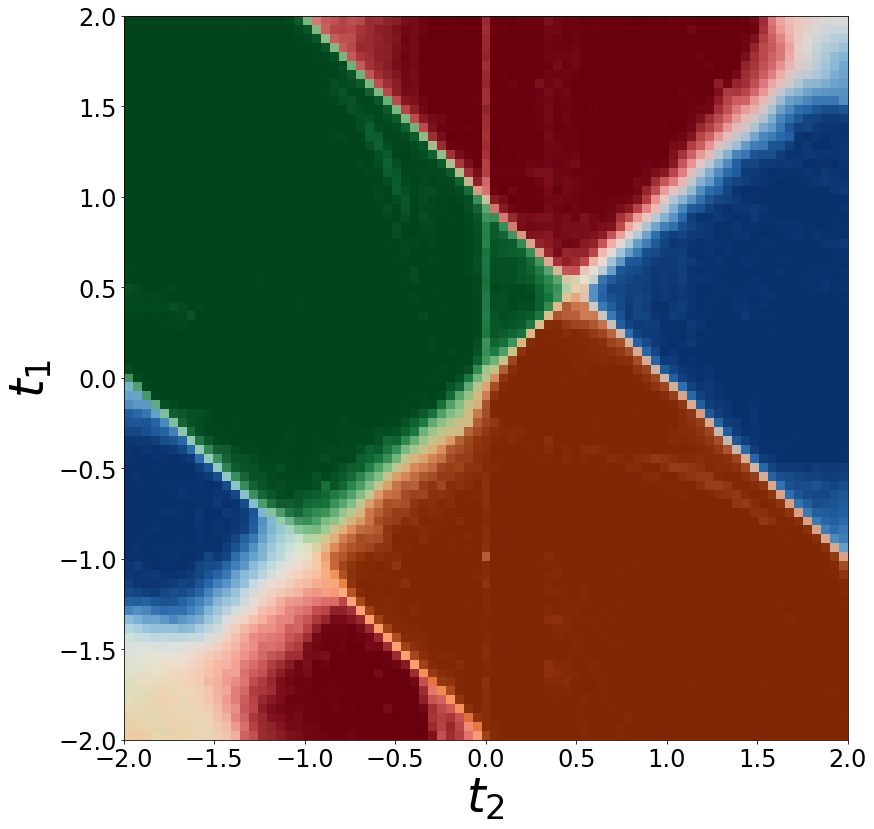

In [52]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None}
colorbar_params={}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [65]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:21<00:00,  4.77it/s]


{'eigenvector_train': 0.9997217312567909,
 'eigenvector_val': 0.974191304347826,
 'eigenvector_test': 0.6740527357392315,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9971340579710143,
 'hamiltonian_test': 0.8789988358556461}

#### Computing bootstrap accuracies

In [66]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8847497089639115}

#### Computing mean feature importances

In [67]:
import operator
save_to_disk = True
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:18<00:00,  5.37it/s]


Sorted feature importances:  [(98, 0.030693232257140227), (1, 0.03043893854456692), (0, 0.026492535144615963), (99, 0.02631928416310056), (96, 0.02071188352379676), (3, 0.020591689324083343), (97, 0.019632623595280233), (2, 0.019620267431373822), (5, 0.019153944680507854), (94, 0.019089977905541386), (4, 0.017172858545106095), (95, 0.017096191660463236), (48, 0.015306082187104384), (51, 0.014949118027725718), (50, 0.013793118734625198), (92, 0.013550951389356549), (7, 0.013547315508194093), (49, 0.013446536283921834), (6, 0.012875600067149915), (93, 0.012764589911553333), (46, 0.012252756613861604), (53, 0.012063978989597116), (90, 0.010919521329294619), (9, 0.01089281527608908), (52, 0.010833744871027), (47, 0.01064326860949792), (44, 0.01044193848995099), (55, 0.01025330156317361), (8, 0.009667973182478097), (91, 0.009641255714932542), (10, 0.009269116291450533), (88, 0.009230160148086369), (11, 0.00921355121214953), (89, 0.00918033215784797), (54, 0.009016393973361484), (45, 0.00894

In [68]:
sorted_cumulative_feature_importances = sorted(simulation.cumulative_feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted cumulative feature importances: ", sorted_cumulative_feature_importances)

Sorted cumulative feature importances:  [(99, 0.9999999999999999), (98, 0.9736807158368993), (97, 0.942987483579759), (96, 0.9233548599844787), (95, 0.902642976460682), (94, 0.8855467848002188), (93, 0.8664568068946774), (92, 0.853692216983124), (91, 0.8401412655937675), (90, 0.8305000098788349), (89, 0.8195804885495402), (88, 0.8104001563916923), (87, 0.8011699962436059), (86, 0.7931652576860004), (85, 0.7849527134807778), (84, 0.7774846902181921), (83, 0.7699602039782301), (82, 0.7626990808115752), (81, 0.7557253390858458), (80, 0.7487796373108714), (79, 0.7420874016983914), (78, 0.7351290286165655), (77, 0.728339716776513), (76, 0.7213954196278272), (75, 0.7146665813543986), (74, 0.7075323073856175), (73, 0.7003899101907045), (72, 0.6933244305977245), (71, 0.686192607790122), (70, 0.6795144034259837), (69, 0.6726609667197202), (68, 0.6659755326028839), (67, 0.6591496282235485), (66, 0.6520256343498229), (65, 0.6449931941524856), (64, 0.637885155749927), (63, 0.6309618211790272), (62

In [69]:
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Plotting feature importances

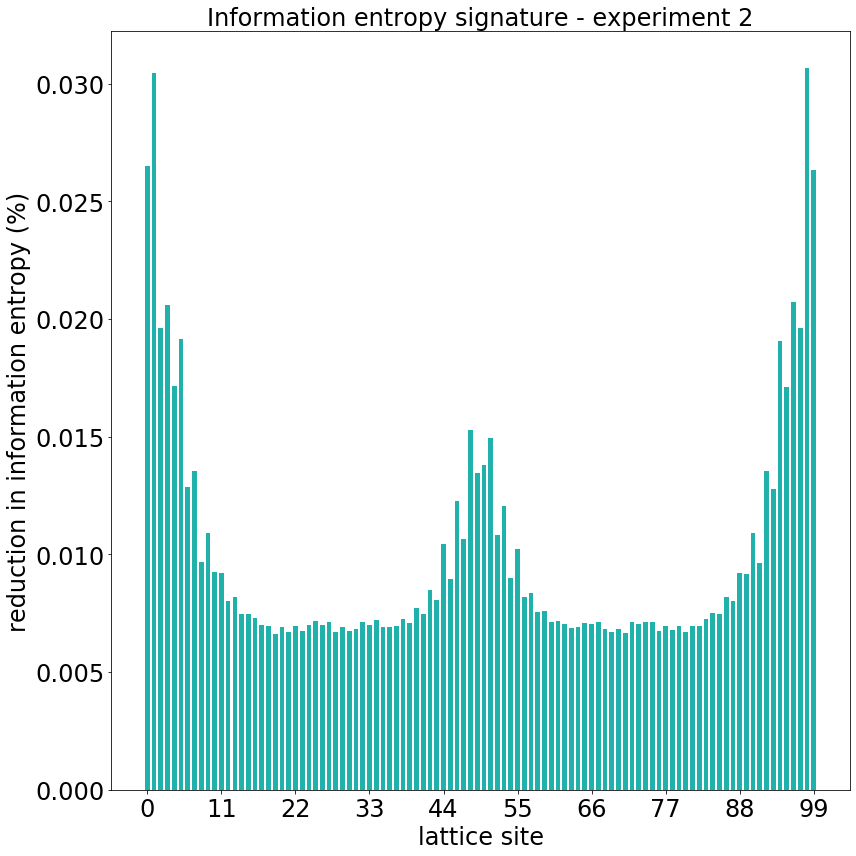

In [81]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "lightseagreen", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

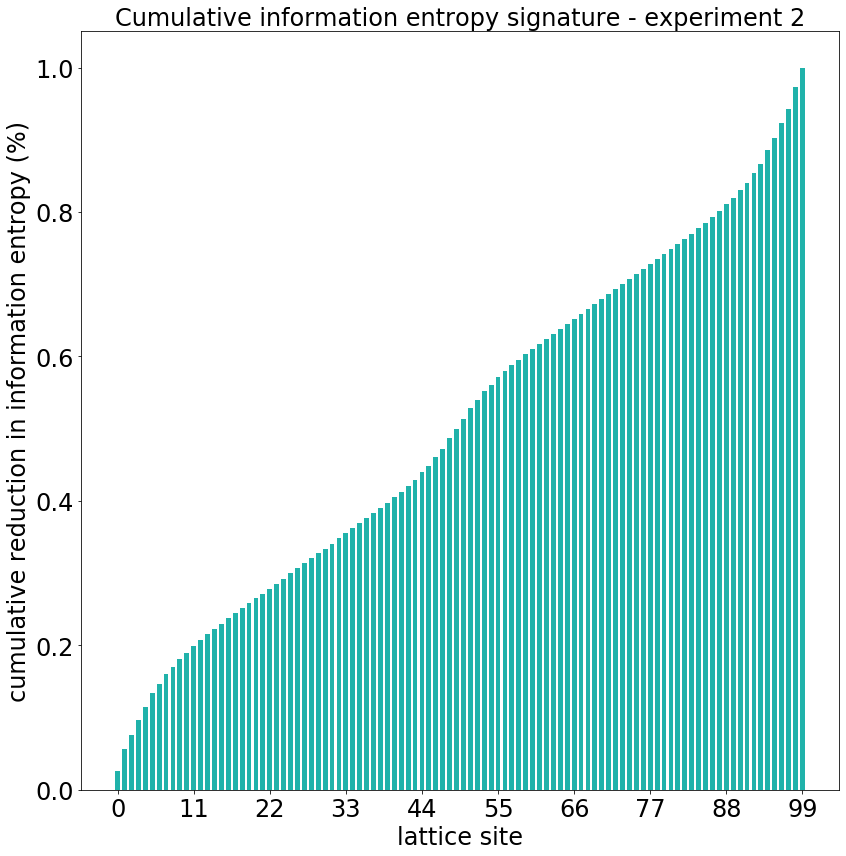

In [88]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"lightseagreen", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 2", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,99,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/second_neighbours_periodic_6561_50_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)
